## Computing Fundamental Transition of CO under different levels of approximation
We will illustrate approximations to the vibrational transition energies, specifically the fundamental ($n=0 \rightarrow n=1$) transition, using the diatomic molecule CO.  

We will use the Morse potential as a model for the "exact" interatomic potential, and we will approximate this potential by different orders of a Taylor expansion: including up to quadratic (which is the harmonic oscillator approximation), cubic, and quartic terms.  The harmonic and Morse potentials are exactly solvable, and the eigenfunctions and eigenvalues of the vibrational Hamiltonian with cubic and quartic potentials can be approximated using perturbation theory.  Therefore, we will
compare the fundamental  transition computed exactly for harmonic and Morse potentials, and approximately at 2nd order of perturbation theory for cubic and quartic potentials to see the impact of various levels of potential truncation and approximation.


Within the Morse model, the vibrational Hamiltonian can be written as
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{Morse}(r), \tag{1}
\end{equation}
where 
\begin{equation}
V_{Morse}(r) = D_e \left(1 - e^{-\beta(r-r_{eq})} \right)^2. \tag{2}
\end{equation}

The Morse parameters for ${\rm CO}$ are as follows: $D_e = 11.225 \: {\rm eV}$, $r_{eq} = 1.1283 \: {\rm Ang.}$, $\beta = 2.5944 \: {\rm Ang.}^{-1}$,
and $\mu = 6.8606 \: {\rm amu}$.

The exact energy eigenvalues for Equation (1) can be written as 
\begin{equation}
E_n = \hbar \omega \left( \left(n+ \frac{1}{2} \right) - \chi_e \left(n+ \frac{1}{2} \right)^2 \right) \tag{3}
\end{equation}
where
\begin{equation}
\omega = \sqrt{\frac{2D_e \beta^2}{\mu}} \tag{4}
\end{equation}
and 
\begin{equation}
\chi_e = \frac{\hbar \omega}{4 D_e}. \tag{5}
\end{equation}

The Morse potential can be approximated by a Taylor expansion as follows:
\begin{equation}
V_T(r) = \sum_{n=0}^{\infty} \frac{ f^{(n)}(r_{eq})}{n!} \left(r-r_{eq} \right)^n, \tag{6}
\end{equation}
where $f^{(n)}(r_{eq})$ is the $n^{th}$-order derivative of the Morse potential evaluated at the equilibrium bondlength, e.g. $f^{(1)}(r_{eq}) = \frac{d}{dr}V_{Morse}(r_{eq}).$

We will define the Harmonic approximation to the potential as 
\begin{equation}
V_H(r) =  \frac{ f^{''}(r_{eq})}{2} \left(r-r_{eq} \right)^2 = \frac{1}{2} k \left(r-r_{eq} \right)^2 \tag{7}
\end{equation}
the cubic approximation to the potential as 
\begin{equation}
V_C(r) =  V_H(r) + \frac{ f^{'''}(r_{eq})}{6} \left(r-r_{eq} \right)^3 = V_H(r) + \frac{1}{6} g \left(r-r_{eq} \right)^3,   \tag{8}
\end{equation}
and the quartic approximation as
\begin{equation}
V_Q(r) =  V_C(r) + \frac{ f^{''''}(r_{eq})}{24} \left(r-r_{eq} \right)^4 =  V_C(r) + \frac{1}{24}h(r-r_{eq})^4.  \tag{9}
\end{equation}

Because we are using the Morse model as the "exact" interatomic potential in this notebook, we can compute these derivatives at $r_{eq}$ analytically:
\begin{align}
k = 2 D_e \beta^2 \\
g = -6 D_e \beta^3 \tag{10} \\
h = 14 D_e \beta^4.
\end{align}
However, in general we do not have an analytical form for the interatomic potential, so we must rely on numerical derivatives of the potential evaluated at the $r_{eq}$.  In the context of interatomic potentials computed by quantum chemistry methods (e.g. CCSD(T)), one must first identify the equilibrium geometry, and then compute derivatives by taking a number of single point calculations along all displacement coordinates to compute differences among.  We will write the explicit expression for the second derivative using centered finite differences along the one displacement coordinate relevant for our ${\rm CO}$ molecule:
\begin{equation}
k=\frac{V_{Morse}(r_{eq}+\Delta r)-2V_{Morse}(r_{eq})+V_{Morse}(r_{eq}-\Delta r)}{\Delta r^2}+\mathcal O (\Delta r^2) \tag{11}
\end{equation}
where $\Delta r$ represents a small displacement along the coordinate $r$.  Higher-order derivatives can also be computed, but will require larger numbers of displacements and therefore more energy evaluations by your quantum chemistry method.  Expressions for higher-order derivatives along a single coordinate can be found [here](https://sameradeeb.srv.ualberta.ca/introduction-to-numerical-analysis/numerical-differentiation/#centred-finite-difference9). Note that the number of displacement coordinates $N$ grows linearly with the number of atoms, and that the number of displacements required to form the $n^{{\rm th}}$-order approximation to the potential grows as $N^n$.

### Perturbation Theory
We can compute the exact vibrational transition energies for the Morse oscillator and the Harmonic oscillator using Equation (3), where the Harmonic oscillator transition energies come from Equation (3) with $\chi_e = 0$.  However, the transition energies when the potential is approximated as $V_C(r)$ or $V_Q(r)$ must be approximated.  We will illustrate the use of Perturbation Theory approximate these transition energies.  

Here we will consider the Hamiltonian 
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{H}(r) + V'(r) = \hat{H}_0 + V'(r) \tag{12},
\end{equation}
where $\hat{H}_0$ is exactly solved by the Harmonic oscillator energy eigenfunctions and eigenvalues ($\psi^{(0)}_n(r)$, $E^{(0)}_n$), and $V'(r)$ is the perturbation which will take the form of either 
$V'(r) = \frac{1}{6}g(r-r_{eq})^3$ or $V'(r) = \frac{1}{6}g(r-r_{eq})^3 + \frac{1}{24}h(r-r_{eq})^4$ in the cubic and quartic approximations, respectively.

We can calculate the energy of state $n$ at 2nd order of perturbation theory as follows:
\begin{equation}
E_n = E_n^{(0)} +  \langle \psi_n^{(0)} | V'(r) | \psi_n^{(0)} \rangle + \sum_{k \neq n} \frac{|\langle \psi_k^{(0)} | V'(r) | \psi_n^{(0)}|^2}{E_n^{(0)}-E_k^{(0)}}. \tag{13}
\end{equation}

Recall that for the zeroth-order functions have the form
\begin{align}
\psi_n^{(0)}(r) &= \sqrt{\frac{1}{2^n n!}} \cdot \left(\frac{\alpha}{\pi} \right)^{1/4} \cdot H_n \left(\sqrt{\alpha} r \right) \cdot {\rm exp}\left(\frac{-\alpha }{2} r^2 \right) \\
\alpha &= \frac{\mu \omega}{\hbar} \\
\omega &= \sqrt{\frac{k}{\mu}}
\end{align}

### Approach
We will compute the fundamental transition ($E_1 - E_0$) using the following approaches:
1. Harmonic approximation: $E_1 - E_0 = \hbar \omega$
2. Exact solution for Morse Hamiltonian: $E_1 - E_0 = \hbar \omega (1 - 2\chi_e)$
3. Evaluation of Eq. (13) for $n=0$ and $n=1$ utilizing the cubic contribution for $V'(r)$
4. Evaluation of Eq. (13) for $n=0$ and $n=1$ utilizing the cubic and quartic contribution for $V'(r)$


### Setting up Morse Oscillator Parameters
The following block will establish the parameters for $\hat{H}_{vib}$ with the Morse potential for the CO molecule.

In [63]:
# library imports for the entire notebook
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from numpy import trapz
from scipy.special import hermite
from math import factorial

# dissociation energy in eV
De_eV = 11.225

# equilibrium bondlength in Angstroms
r_eq_ang = 1.1283

# reduced mass in amu
mu_amu = 6.8606

# potential curvature in inverse angstromgs
beta_inv_ang = 2.5994

### Unit conversion
We will use atomic units for our calculations and convert to spectroscopic units later.  In the following block, we will store different conversion factors as variables for later use.  

In [94]:
# atomic mass units to kg
amu_to_kg = 1.66054e-27

# angstroms to meters
ang_to_m = 1e-10

# electron volts to Jouls
eV_to_J = 1.60218e-19

# electron volts to atomic units of energy (Hartrees)
eV_to_au = 1 / 27.211 #0.0367493

# angstroms to atomic units of length (Bohr radii)
au_to_ang = 0.52917721067121

# atomic mass units to atomic units of mass 
amu_to_au = 1822.89

The fllowing block will use the conversion factors above to store the Morse oscillator parameters in atomic units.

In [95]:

# dissociation energy in au
De_au = De_eV * eV_to_au

# reduced mass in SI
mu_au = mu_amu * amu_to_au

# equilibrium bondlength in SI
r_eq_au = r_eq_ang / au_to_ang

# beta in SI
beta_au = beta_inv_ang * au_to_ang

# hbar in SI
hbar_au = 1

# h in SI
h_SI = np.pi * 2


### Evaluating the Morse potential in atomic units
Here we will create an numpy array of bondlength values between $0$ and $2.5 r_{eq}$

In [109]:
def evaluate_Morse(r, De, beta, r_eq):
    """ Helper function to evaluate the Morse potential at a given value of r
    
    Arguments
    ---------
    r : float
        value(s) of r to evaluate potential at
        
    De : float
        dissociation energy of the Morse oscillator
        
    beta : float
        related to the curvature of the Morse oscillator
        
    r_eq : float
        equilibrium bondlength of the Morse oscillator
        
    Returns
    -------
    V_m : float
        value of the Morse potential at value(s) of r
    
    """
    return De * (1 - np.exp(-beta * (r - r_eq))) ** 2


# array of bondlength values
r = np.linspace(0, 2.5 * r_eq_au, 500)

# array of Morse potential values
V_Morse = evaluate_Morse(r, De_au, beta_au, r_eq_au)

### Expanding the Morse potential as a Taylor series
In the following block, we will compute the analytical $k$, $g$, and $h$ terms defined in Equation 10.  We will compare the value of $k$ computed analytically to the value computed numerically by Eq. (11), as well. 

In [110]:
# analytical evaluation of k
k = 2 * De_au * beta_au ** 2

# analytical evaluation of g
g = -6 * De_au * beta_au ** 3

# analytical evalution of h
h = 14 * De_au * beta_au ** 4

# numerical evaluation of k

# small displacement along r
delta_r = 0.001 * r_eq_au

# value of Morse potential at forward displacement
V_f = evaluate_Morse(r_eq_au + delta_r, De_au, beta_au, r_eq_au)

# value of Morse potential at equilibrium
V_eq = evaluate_Morse(r_eq_au, De_au, beta_au, r_eq_au)

# value of Morse potential at backward displacement
V_b = evaluate_Morse(r_eq_au - delta_r, De_au, beta_au, r_eq_au)

# CFD approximation to k
k_num = (V_f - 2 * V_eq + V_b) / delta_r ** 2

# compare the numerical and analytic evaluation of k
print(k_num, k)
if np.isclose(k, k_num):
    print(" The numerical and analytical values for k agree to within +/- 0.0001 atomic units.")
    

1.5610705004791825 1.561062667389548
 The numerical and analytical values for k agree to within +/- 0.0001 atomic units.


Next we will evaluate the Harmonic, cubic, and quartic models for the interatomic potential and plot all against the Morse potential.

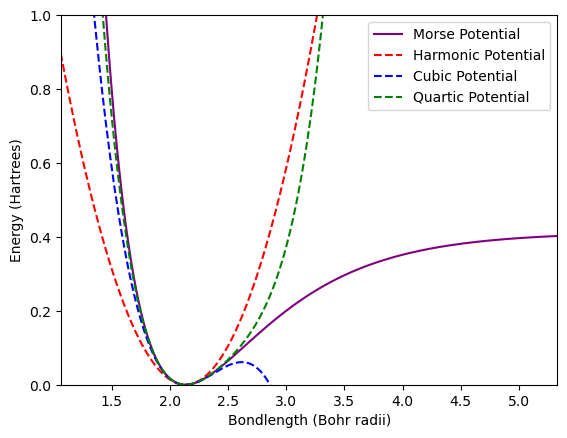

In [111]:
# Harmonic potential
V_H = 1/2 * k * (r -r_eq_au) ** 2

# cubic
V_C = V_H + 1/6 * g * (r - r_eq_au) ** 3

# quartic 
V_Q = V_C + 1/24 * h * (r - r_eq_au) ** 4

plt.plot(r, V_Morse, 'purple', label="Morse Potential")
plt.plot(r, V_H, 'r--', label="Harmonic Potential")
plt.plot(r, V_C, 'b--', label="Cubic Potential")
plt.plot(r, V_Q, 'g--', label="Quartic Potential")
plt.xlim(0.5 * r_eq_au, 2.5 * r_eq_au)
plt.ylim(0, 1)
plt.xlabel("Bondlength (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()

### Compute $E_1$ and $E_2$ using Perturbation Theory
We will need access to the zeroth-order states $\psi_n^{(0)}(r)$ to compute the 1st and 2nd order energy corrections.
The following helper functions will give us access to these states and will also perform the operations necessary to compute the perturbative corrections.

In [100]:
def compute_alpha(k, mu, hbar):
    """ Helper function to compute \alpha = \sqrt{k * \omega / \hbar}
    
    Arguments
    ---------
    k : float
        the Harmonic force constant
        
    mu : float
        the reduced mass
        
    hbar : float
        reduced planck's constant
        
    Returns
    -------
    alpha : float
        \alpha = \sqrt{k * \omega / \hbar}
    
    """
    # compute omega
    omega = np.sqrt( k / mu )
    
    # compute alpha
    alpha =  mu * omega / hbar
    
    # return alpha
    return alpha

def N(n, alpha):
    """ Helper function to take the quantum number n of the Harmonic Oscillator and return the normalization constant
        
    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator
        
    Returns
    -------
    N_n : float
        the normalization constant
    """
    
    return  np.sqrt( 1 / (2 ** n * factorial(n)) ) * ( alpha / np.pi ) ** (1/4) 

def psi(n, alpha, r, r_eq):
    """ Helper function to evaluate the Harmonic Oscillator energy eigenfunction for state n
        
    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator
        
    alpha : float
        alpha value
        
    
    r : float
        position at which psi_n will be evaluated
        
    r_eq : float
        equilibrium bondlength
        
    Returns
    -------
    psi_n : float
        value of the harmonic oscillator energy eigenfunction
        
    """
    
    Hr = hermite(n)
    
    psi_n = N(n, alpha) * Hr( np.sqrt(alpha) * ( r - r_eq )) * np.exp( -0.5 * alpha  * (r - r_eq)**2)
    
    return psi_n

def harmonic_eigenvalue(n, k, mu, hbar):
    """ Helper function to evaluate the energy eigenvalue of the harmonic oscillator for state n"""
    
    return hbar * np.sqrt(k/mu) * (n + 1/2)

def morse_eigenvalue(n, k, mu, De, hbar):
    """ Helper function to evaluate the energy eigenvalue of the Morse oscillator for state n"""
    
    omega = np.sqrt( k / mu )
    xi = hbar * omega / (4 * De)

    return hbar * omega * ( (n + 1/2) - xi * (n + 1/2) ** 2)

def potential_matrix_element(n, m, alpha, r, r_eq, V_p):
    """ Helper function to compute <n|V_p|m> where V_p is the perturbing potential
    
    Arguments
    ---------
    n : int
        quantum number of the bra state
        
    m : int
        quantum number of the ket state
        
    alpha : float
        alpha constant for bra/ket states
        
    r : float
        position grid for bra/ket states
        
    r_eq : float
        equilibrium bondlength for bra/ket states
        
    V_p : float
        potential array
        
    Returns
    -------
    V_nm : float
        <n | V_p | m > 
    
    """
    # bra 
    psi_n = psi(n, alpha, r, r_eq)
    
    # ket 
    psi_m = psi(m, alpha, r, r_eq)
    
    # integrand
    integrand = np.conj(psi_n) * V_p * psi_m
    
    # integrate
    V_nm = np.trapz(integrand, r)
    
    return V_nm

# Test out the eigenfunctions
Here we will plot $\psi_0^{(0)}$ against the Harmonic potential and will also test to make sure it is properly normalized.

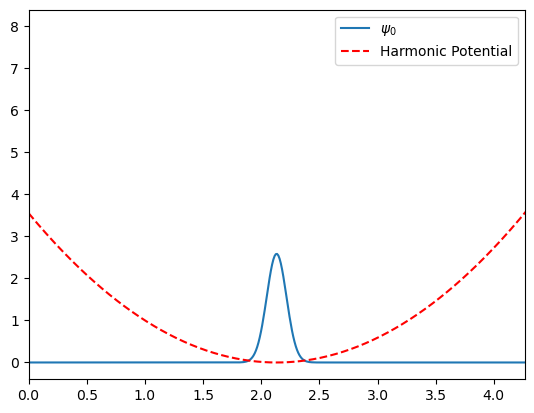

In [112]:
# compute alpha
alpha = compute_alpha(k, mu_au, hbar_au)

# compute psi_0 along the r grid
psi_0 =psi(0, alpha, r, r_eq_au)

# is it normalized?
Integral = trapz(psi_0 ** 2, r)

assert np.isclose(Integral, 1.0)


# Harmonic potential
plt.plot(r, psi_0, label='$\psi_0$')
plt.plot(r, V_H, 'r--', label="Harmonic Potential")
plt.xlim(0, 2 * r_eq_au)
plt.legend()
plt.show()

# Compute the fundamental transition energies
Now we will compute the fundamental transition energies at all levels of theory and plot the results in both atomic units and in wavenumbers.

In [108]:
# fundamental transition energy at HO level
fundamental_HO = harmonic_eigenvalue(1, k, mu_au, hbar_au) - harmonic_eigenvalue(0, k, mu_au, hbar_au)

# fundamental transition energy at Morse level
fundamental_Morse = morse_eigenvalue(1, k, mu_au, De_au, hbar_au) - morse_eigenvalue(0, k, mu_au, De_au, hbar_au)

# 1st order correction using the cubic potential
pt1_cubic = potential_matrix_element(0, 0, alpha, r, r_eq_au, (V_C - V_H))

# 1st order correction using the quartic potential
pt1_quartic = potential_matrix_element(0, 0, alpha, r, r_eq_au, (V_Q - V_H))

# 2nd order corrections using cubic and quartic potentials
pt2_cubic = 0
pt2_quartic = 0

# sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    E_j = harmonic_eigenvalue(j, k, mu_au, hbar_au)
    Vc_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au, (V_C - V_H))
    pt2_cubic += Vc_j0 ** 2 / (fundamental_HO - E_j)
    Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au, (V_Q - V_H))
    pt2_quartic += Vq_j0 ** 2 / (fundamental_HO - E_j)
 
          

0.3040138648362092 0.29989696372206
0.3040138648362092
0.3049144369549293
0.30138934037593906
0.30227365198030876


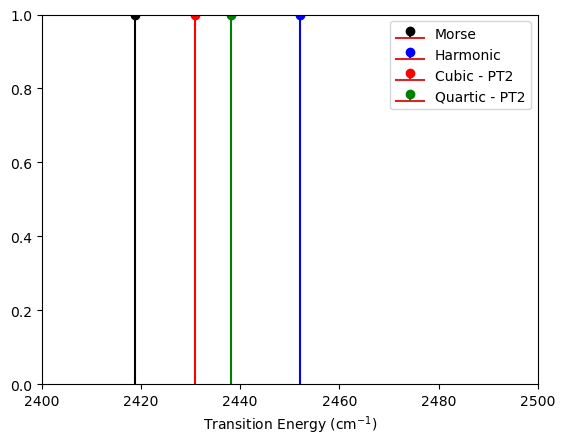

In [133]:
import matplotlib.pyplot as plt

cubic_fo = fundamental_HO + pt1_cubic
quartic_fo = fundamental_HO + pt1_quartic

cubic_so = cubic_fo + pt2_cubic
quartic_so = quartic_fo + pt2_quartic

au_to_wn = 219474.63068

morse_plot = np.array([fundamental_Morse * au_to_wn, 1.0])
HO_plot = np.array([fundamental_HO * au_to_wn, 1.0])
cubic_so_plot = np.array([cubic_so * au_to_wn, 1.0])
quartic_so_plot = np.array([quartic_so * au_to_wn, 1.0])






plt.stem(morse_plot[0], morse_plot[1], "black", label="Morse")
plt.stem(HO_plot[0], HO_plot[1], "blue", label="Harmonic")
plt.stem(cubic_so_plot[0], cubic_so_plot[1], "red", label="Cubic - PT2")
plt.stem(quartic_so_plot[0], quartic_so_plot[1], "green", label="Quartic - PT2")
plt.xlim(2400, 2500)
plt.ylim(0, 1)
plt.xlabel("Transition Energy (cm$^{-1}$)")
plt.legend()
plt.show()


Create and fit Morse potential in atomic units

Now plot the potential and compute some eigenvalues

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate

# first compute and plot Morse potential
r = np.linspace(0.75 * r_eq_SI, 2.5 * r_eq_SI, 1000)
V_r = De_SI * (1 - np.exp(-beta_SI * (r - r_eq_SI))) ** 2

V_r_spline = interpolate.UnivariateSpline(r, V_r, k=5)


# now define the expansion coefficients to expand the Morse potential as a polynomial
# harmonic
k = 2 * De_SI * beta_SI ** 2
f_spline = V_r_spline.derivative()
k_spline = f_spline.derivative()
#g_spline = k_spline.derivative()
#h_spline = g_spline.derivative()

k_num = k_spline(r_eq_SI)
#g_num = g_spline(r_eq_SI)
#h_num = h_spline(r_eq_SI)

V_H = 1/2 * k_num * (r -r_eq_SI) ** 2

# cubic
#g = -6 * De_SI * beta_SI ** 3

#V_C = V_H + 1/6 * g_num * (r - r_eq_SI) ** 3

# quartic 
#h = 14 * De_SI * beta_SI ** 4

#V_Q = V_H + V_C + 1/24 * h_num * (r - r_eq_SI) ** 4


plt.plot(r, V_r, 'red')
plt.plot(r, V_r_spline(r), 'blue')
#plt.plot(r, V_C, 'green')
#plt.plot(r, V_Q, 'purple')
plt.xlim(0.75 * r_eq_SI, 1.5 * r_eq_SI)
#plt.ylim(0, 2e-18)
plt.show()

In [ ]:
# now compute fundamental and anharmonic correction
omega_SI = np.sqrt(2 * De_SI * beta_SI ** 2 / mu_SI)
xe_SI = hbar_SI * omega_SI / (4 * De_SI)

# compute and print fundamental energy in SI
E0 = hbar_SI * omega_SI * ((0 + 1/2) - xe_SI * (0 + 1/2) ** 2 )
E1 = hbar_SI * omega_SI * ((1 + 1/2) - xe_SI * (1 + 1/2) ** 2 )
fundamental_SI = E1-E0
print(fundamental_SI)
print(fundamental_SI * J_to_wn)


In [ ]:
B = h_SI / (8 * np.pi ** 2 * c_SI * mu_SI * r_eq_SI ** 2)

In [ ]:
print(B)

In [3]:
# dissociation energy in SI
De_SI = De_eV * eV_to_J

# reduced mass in SI
mu_SI = mu_amu * amu_to_kg

# equilibrium bondlength in SI
r_eq_SI = r_eq_ang * ang_to_m

# beta in SI
beta_SI = beta_inv_ang / ang_to_m

# hbar in SI
hbar_SI = 1.05457182e-34

# h in SI
h_SI = 6.626e-34

# c in SI
c_SI = 2.99e8

# conversion from J to cm^-1
J_to_wn = 5.03445e22
print(mu_SI)

1.1392300724e-26
